# The Battle of Neighborhoods  
How to move to neighborhood that feels like home!  
  
## Introduction  
Different cities have very different neighborhoods that are filled of cultures, habits and types of people. In today's world, relocation is no longer an option; it is a necessity in pursuing a great career. Changing your home environment is not as easy as moving your furniture there is a lot more to leave such as neighbors, people and most importantly the culture of your environment.  
  
## Problem Description  
The question that arises here is _"how to make such a big change in your life less troublesome?"_ or in a more elegant way  
__"How to move to neighborhood that feels like home!"__  
  
The answer introduced here relies on a very simple yet powerful idea, _how do neighborhoods express there environment?_  
In most cases you can tell the culture of a neighborhood from it is venues. A neighborhood full of chinese restaurants is probably a chinese neighborhood, another that has lots of museums is more like an ancient culture neighborhood.  
  
The idea here is to let neighborhoods express themselves by exploring every neighborhood's venues

## Data Sources  
#### New York Sources:  
* [Demographic Data from NYC open data](https://data.cityofnewyork.us/City-Government/Census-Demographics-at-the-Neighborhood-Tabulation/rnsn-acs2)  
  
#### Toronto Sources:  
* [Demographic Data from Toronto open data](https://open.toronto.ca/dataset/wellbeing-toronto-demographics/)  
  
#### Neiborhood Coordinates  
* [Google Maps API](https://developers.google.com/maps/documentation/geocoding/intro)
  
#### Venues Sources:  
* [Foursquare API](https://foursquare.com/)  
  
## Solution Idea  
Demographic data of all neighborhoods can be used to cluster neighborhoods within Toronto city adding to that different types of venues; a good model of how the neighborhood environment feel can be captured and used to get the features of every cluster of neighborhoods. Clusters then will be used to classify different neighborhoods of New York; Thus creating a mapping between the two cities that can help people moving to find their home neighborhood in a another continent!

## Import Libraries

In [1]:
!pip install folium
import pandas as pd
import numpy as np
import re
import requests 
import json
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

     |████████████████████████████████| 92kB 12.7MB/s eta 0:00:01


## Import New York Demographic Data

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_3ad972c3805d4716bec9eb885c702fd9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='CR9ySYskBH47Dvy-Lngw6RQt-9FP2idOKJxf64qeyp49',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_3ad972c3805d4716bec9eb885c702fd9.get_object(Bucket='courseracapstone-donotdelete-pr-ss1lj4muewgcce',Key='New_York_Dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_ny = pd.read_csv(body)

## Clean Data

In [3]:
df_ny = df_ny.T

In [4]:
df_ny.columns = df_ny.iloc[0]
df_ny = df_ny.drop(['Neiborhoods'])
df_ny.index = [re.sub(r'(^[A-Z0-9]+)', r'', nb) for nb in df_ny.index]

In [5]:
df_ny=df_ny.loc[:,'Male':].div(df_ny['Total population'], axis=0)

In [6]:
df_ny=df_ny.apply(pd.to_numeric)

In [7]:
df_ny = df_ny.reset_index().rename(columns={'index':'Neiborhoods'})

In [8]:
df_ny = df_ny.drop('Female', axis=1)

In [9]:
df_ny['Neiborhoods'] = df_ny['Neiborhoods'].str.replace('-', ',')
print(df_ny.shape)
df_ny.head()

(192, 21)


Neiborhoods,Neiborhoods,Male,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,...,60 to 64 years,65 to 74 years,75 to 84 years,85 years and over,Black or African American,Chinese,Filipino,Japanese,Korean,Other Asian
0,Williamsburg,0.512367,0.187736,0.114932,0.110272,0.099884,0.093335,0.120629,0.073596,0.065828,...,0.030066,0.024248,0.023456,0.016236,0.027812,0.000274,0.000457,0.000000,0.000000,0.000183
1,"North Side,South Side",0.483829,0.065487,0.053831,0.050250,0.051248,0.089494,0.291839,0.155459,0.105492,...,0.030497,0.036531,0.022010,0.011309,0.056544,0.013197,0.005839,0.007402,0.007467,0.010549
2,Greenpoint,0.491688,0.029725,0.027854,0.028996,0.027885,0.084163,0.331927,0.141647,0.129053,...,0.048189,0.041685,0.031280,0.012721,0.009644,0.011325,0.003743,0.003743,0.009834,0.021382
3,East Williamsburg,0.470125,0.040446,0.027537,0.040477,0.044036,0.091630,0.287197,0.138893,0.105022,...,0.043734,0.064183,0.052511,0.016830,0.104208,0.091479,0.004886,0.006123,0.008807,0.007872
4,"Brooklyn Heights,Cobble Hill",0.502383,0.065452,0.023108,0.023279,0.047196,0.062303,0.247213,0.180526,0.109116,...,0.057664,0.068516,0.036344,0.017746,0.054558,0.031875,0.003958,0.006086,0.009916,0.021066


# Explaratory Data Analysis

## Demographic Clustering of Neighborhoods

In [10]:
kclusters = 10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_ny.drop(['Neiborhoods'], axis=1))
df_ny.insert(1, 'Cluster Labels', kmeans.labels_)

In [11]:
bad_nbs = []
latitude  = []
longitude = []
for nb in df_ny['Neiborhoods'].iteritems():
    geolocator = Nominatim(user_agent="specify_your_app_name_here")
    try: 
        location = geolocator.geocode(nb[1])
    except:
        location = None
    if(location == None):
        try: 
            location = geolocator.geocode(nb[1]+',NY')
        except:
            location = None
        if(location == None):
            bad_nbs.append(nb[1])
    
    if(location != None):
        latitude.append(location.latitude)
        longitude.append(location.longitude)

In [12]:
df_ny = df_ny.set_index('Neiborhoods').drop(bad_nbs, axis=0)
df_ny.insert(1, 'Latitude', latitude)
df_ny.insert(2, 'Longitude', longitude)

In [13]:
# create map
map_clusters = folium.Map(location=[40.7128,-74.0060], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_ny['Latitude'], df_ny['Longitude'], df_ny.index, df_ny['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [14]:
print(df_ny.drop(['Latitude','Longitude'],axis=1).groupby('Cluster Labels').mean().mean())

Neiborhoods
Male                         0.474494
Under 5 years                0.063036
5 to 9 years                 0.057625
10 to 14 years               0.058184
15 to 19 years               0.065237
20 to 24 years               0.077470
25 to 34 years               0.165553
35 to 44 years               0.141310
45 to 54 years               0.137743
55 to 59 years               0.058836
60 to 64 years               0.051244
65 to 74 years               0.065826
75 to 84 years               0.040270
85 years and over            0.017666
Black or African American    0.279396
Chinese                      0.086227
Filipino                     0.009904
Japanese                     0.002495
Korean                       0.015601
Other Asian                  0.055740
dtype: float64


In [15]:
print(df_ny.drop(['Latitude','Longitude'],axis=1).groupby('Cluster Labels').mean().std())

Neiborhoods
Male                         0.018248
Under 5 years                0.008883
5 to 9 years                 0.011007
10 to 14 years               0.012219
15 to 19 years               0.011620
20 to 24 years               0.010990
25 to 34 years               0.037947
35 to 44 years               0.006065
45 to 54 years               0.012202
55 to 59 years               0.006011
60 to 64 years               0.007777
65 to 74 years               0.009895
75 to 84 years               0.008481
85 years and over            0.004781
Black or African American    0.321181
Chinese                      0.139286
Filipino                     0.008781
Japanese                     0.002848
Korean                       0.023596
Other Asian                  0.064199
dtype: float64


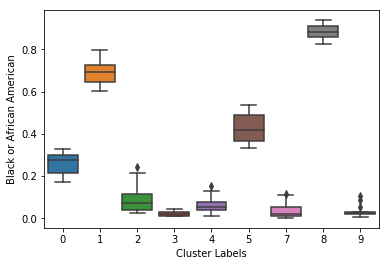

In [16]:
sns_plot = sns.boxplot(y='Black or African American', x='Cluster Labels', data=df_ny)

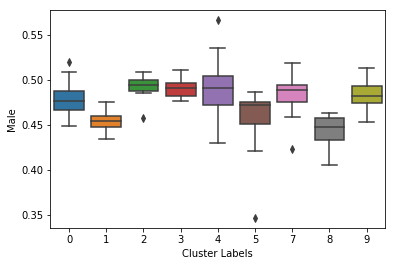

In [17]:
sns_plot = sns.boxplot(y='Male', x='Cluster Labels', data=df_ny)

## Clustering Data using Foursquare Venues Info

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neiborhoods', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
CLIENT_ID = 'BCGLOYHSPFRYQDBGRXSWZRLGNG1EE4RNMA5HJORAE5U2UXTH' # your Foursquare ID
CLIENT_SECRET = '5WVL0EZZ2XXHBOXRP25Y0CEVQTIPGVOTEAKHH4BX3OHZUDD0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT=100
radius=500

ny_venues = getNearbyVenues(names=df_ny.index,
                            latitudes=df_ny['Latitude'],
                            longitudes=df_ny['Longitude']
                           )

In [20]:
url = "https://developer.foursquare.com/docs/build-with-foursquare/categories/"
source = requests.get(url).text
categories = BeautifulSoup(source, 'lxml').find('ul', class_='VenueCategories__Wrapper-sc-1ysxg0y-0 bYmzDC')

categories_map = []
for category in categories.findAll('li', recursive=False):
    #print(category.h3.text)
    key = category.h3.text
    value=set()
    value.add(category.h3.text)
    sub1Class = category.find('ul', class_='VenueCategories__Wrapper-sc-1ysxg0y-0 bYmzDC')
    for sub1 in sub1Class.findAll('li', recursive=False):
        #print("    " + sub1.h3.text)
        value.add(sub1.h3.text)
        sub2Class = sub1.find('ul', class_='VenueCategories__Wrapper-sc-1ysxg0y-0 bYmzDC')
        for sub2 in sub2Class.findAll('li', recursive=False):
            #print("    "*2 + sub2.h3.text)
            value.add(sub2.h3.text)
            sub3Class = sub2.find('ul', class_='VenueCategories__Wrapper-sc-1ysxg0y-0 bYmzDC')
            for sub3 in sub3Class.findAll('li', recursive=False):
                #print("    "*3 + sub3.h3.text)
                value.add(sub3.h3.text)
                sub4Class = sub3.find('ul', class_='VenueCategories__Wrapper-sc-1ysxg0y-0 bYmzDC')
                for sub4 in sub4Class.findAll('li', recursive=False):
                    #print("    "*4 + sub4.h3.text)            
                    value.add(sub4.h3.text)
    categories_map.append((key, value))

In [21]:
def map_categories(category):
    for category_tuple in categories_map:
        if(category['Venue Category'] in category_tuple[1]):
            return category_tuple[0]

In [22]:
ny_venues_mapped = ny_venues.copy()
ny_venues_mapped[['Venue Category']] = ny_venues.apply(map_categories, axis=1)
ny_venues_mapped.describe(include='all')

,Neiborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,4220,4220.000000,4220.000000,4220,4220.000000,4220.000000,4220
unique,127,NaN,NaN,3332,NaN,NaN,9
top,East Village,NaN,NaN,Dunkin',NaN,NaN,Food
freq,100,NaN,NaN,62,NaN,NaN,2312
mean,NaN,40.975812,-72.276242,NaN,40.975829,-72.276336,NaN
std,NaN,1.871989,12.299897,NaN,1.871842,12.299899,NaN
min,NaN,26.504215,-122.253856,NaN,26.503733,-122.258454,NaN
25%,NaN,40.689722,-73.984401,NaN,40.689487,-73.984052,NaN
50%,NaN,40.735519,-73.950062,NaN,40.734937,-73.950200,NaN
75%,NaN,40.778007,-73.877636,NaN,40.777949,-73.873895,NaN


In [23]:
ny_onehot = pd.get_dummies(ny_venues_mapped[['Venue Category']], prefix="", prefix_sep="")
ny_onehot['Neighborhood'] = ny_venues_mapped['Neiborhoods']
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()

In [24]:
kclusters = 10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_grouped.drop(['Neighborhood'], axis=1))
ny_grouped.insert(1, 'Cluster Labels', kmeans.labels_)

In [25]:
print(ny_grouped.groupby('Cluster Labels').mean().mean())

Arts & Entertainment           0.030623
College & University           0.000368
Food                           0.317080
Nightlife Spot                 0.126238
Outdoors & Recreation          0.188914
Professional & Other Places    0.003453
Residence                      0.001095
Shop & Service                 0.274572
Travel & Transport             0.057658
dtype: float64


In [26]:
print(ny_grouped.groupby('Cluster Labels').mean().std())

Arts & Entertainment           0.064371
College & University           0.001163
Food                           0.261892
Nightlife Spot                 0.181920
Outdoors & Recreation          0.293911
Professional & Other Places    0.005236
Residence                      0.002376
Shop & Service                 0.292317
Travel & Transport             0.100951
dtype: float64


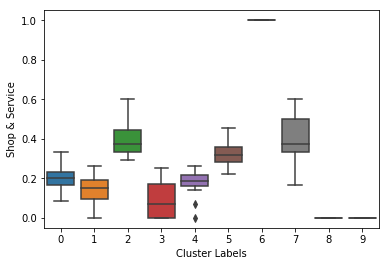

In [27]:
sns_plot = sns.boxplot(y='Shop & Service', x='Cluster Labels', data=ny_grouped)

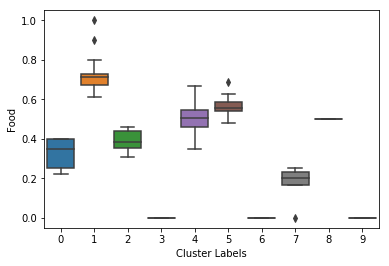

In [28]:
sns_plot = sns.boxplot(y='Food', x='Cluster Labels', data=ny_grouped)

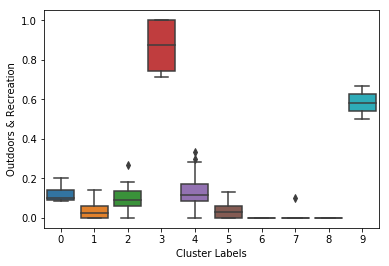

In [29]:
sns_plot = sns.boxplot(y='Outdoors & Recreation', x='Cluster Labels', data=ny_grouped)

## Clustering using Both Sources 

In [30]:
df_ny_feat = df_ny.join(ny_grouped.set_index('Neighborhood').drop('Cluster Labels', axis=1)).drop('Cluster Labels', axis=1)

In [31]:
df_ny_feat.replace(np.nan, 0, inplace=True)

In [32]:
kclusters = 10
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_ny_feat.drop(['Latitude','Longitude'], axis=1))
df_ny_feat.insert(1, 'Cluster Labels', kmeans.labels_)

In [33]:
# create map
map_clusters = folium.Map(location=[40.7128,-74.0060], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_ny_feat['Latitude'], df_ny_feat['Longitude'], df_ny_feat.index, df_ny_feat['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:
df_ny_feat.drop(['Latitude','Longitude'], axis=1).groupby('Cluster Labels').std()

,Male,Under 5 years,5 to 9 years,10 to 14 years,15 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,...,Other Asian,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
0,0.058003,0.053979,0.027731,0.024494,0.020794,0.004232,0.065268,0.027966,0.027584,0.003641,...,0.021017,0.017750,0.000000,0.067718,0.017750,0.055552,0.000000,0.000000,0.123548,0.125900
1,0.024326,0.024099,0.020374,0.021063,0.022562,0.030020,0.064982,0.019843,0.017115,0.009203,...,0.033337,0.029858,0.009083,0.130742,0.127039,0.047845,0.026244,0.013185,0.064431,0.034977
2,0.019690,0.015341,0.014262,0.015475,0.013791,0.014583,0.031704,0.014648,0.017329,0.010610,...,0.039744,0.058999,0.007190,0.121327,0.044374,0.078556,0.031145,0.000000,0.136194,0.036769
3,0.018034,0.009803,0.007640,0.012658,0.013275,0.009927,0.019342,0.012599,0.008729,0.003593,...,0.021418,0.000000,0.000000,0.000000,0.221527,0.196399,0.000000,0.000000,0.106944,0.058321
4,0.011887,0.009548,0.008754,0.007703,0.007378,0.011307,0.020503,0.012201,0.016992,0.008190,...,0.039760,0.016584,0.000000,0.067325,0.041821,0.025906,0.012343,0.000000,0.085091,0.033880
5,0.018312,0.015235,0.013438,0.017593,0.014529,0.012039,0.019100,0.008940,0.017048,0.015000,...,0.081083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.018031,0.013096,0.010509,0.010211,0.009728,0.008726,0.020362,0.009066,0.014605,0.009238,...,0.009880,0.041037,0.000000,0.145856,0.061810,0.074131,0.000000,0.000000,0.077816,0.101353
7,0.025918,0.014638,0.014750,0.007748,0.026483,0.036701,0.056415,0.021716,0.024638,0.015476,...,0.135956,0.188982,0.000000,0.126323,0.129180,0.032416,0.010499,0.000000,0.102789,0.070388
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Using Clustered Data to Clasify Toronto Neighborhoods

## Construct Demographic Data Features

In [35]:
body = client_3ad972c3805d4716bec9eb885c702fd9.get_object(Bucket='courseracapstone-donotdelete-pr-ss1lj4muewgcce',Key='Toronto_Dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_toronto = pd.read_csv(body)
df_toronto.rename(columns={'0':'Neighborhoods'}, inplace=True)

In [36]:
df_toronto.loc[:,'Males':] = df_toronto.loc[:,'Males':].div(df_toronto.iloc[:,2], axis=0)
df_toronto = df_toronto.drop(df_toronto.columns[1], axis=1)

In [37]:
df_toronto.head()

,Neighborhoods,Males,Females,0 - 4 years,5 - 9 years,10 - 14 years,15 -19 years,20 - 24 years,25 – 34 years,35 – 44 years,...,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,Black,Chinese,Filipino,Japanese,Korean,Other Asian
0,West Humber-Clairville,1.0,0.979442,0.123044,0.131022,0.142682,0.133783,0.157410,0.445229,0.295489,...,0.062289,0.043878,0.028536,0.018717,0.337220,0.048788,0.084995,0.001841,0.007978,0.819883
1,Mount Olive-Silverstone-Jamestown,1.0,1.020755,0.168553,0.168553,0.168868,0.143711,0.151572,0.461635,0.297799,...,0.048742,0.031447,0.016981,0.009119,0.454403,0.037736,0.044654,0.004717,0.004088,0.917296
2,Thistletown-Beaumond Heights,1.0,1.027551,0.125510,0.127551,0.131633,0.128571,0.133673,0.447959,0.298980,...,0.086735,0.078571,0.052041,0.038776,0.295918,0.015306,0.025510,0.000000,0.013265,0.568367
3,Rexdale-Kipling,1.0,1.061479,0.111431,0.123919,0.127762,0.122959,0.121037,0.468780,0.312200,...,0.088377,0.083573,0.066282,0.054755,0.165226,0.027858,0.048031,0.022094,0.004803,0.369837
4,Elms-Old Rexdale,1.0,1.044420,0.157096,0.151679,0.161430,0.141928,0.133261,0.481040,0.321777,...,0.059588,0.044420,0.032503,0.011918,0.536295,0.035753,0.085590,0.002167,0.016251,0.302275


In [38]:
bad_nbs = []
latitude  = []
longitude = []
for nb in df_toronto.iloc[:,0].iteritems():
    geolocator = Nominatim(user_agent="specify_your_app_name_here")
    try: 
        location = geolocator.geocode(nb[1])
    except:
        location = None
        
    if(location != None):
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    else:
        bad_nbs.append(nb[0])

In [39]:
df_toronto = df_toronto.drop(bad_nbs, axis=0)
df_toronto.insert(1, 'Latitude', latitude)
df_toronto.insert(2, 'Longitude', longitude)
df_toronto.head()

,Neighborhoods,Latitude,Longitude,Males,Females,0 - 4 years,5 - 9 years,10 - 14 years,15 -19 years,20 - 24 years,...,70 - 74 years,75 - 79 years,80 - 84 years,85 years and over,Black,Chinese,Filipino,Japanese,Korean,Other Asian
0,West Humber-Clairville,53.895042,-0.161158,1.0,0.979442,0.123044,0.131022,0.142682,0.133783,0.157410,...,0.062289,0.043878,0.028536,0.018717,0.337220,0.048788,0.084995,0.001841,0.007978,0.819883
3,Rexdale-Kipling,43.722114,-79.572292,1.0,1.061479,0.111431,0.123919,0.127762,0.122959,0.121037,...,0.088377,0.083573,0.066282,0.054755,0.165226,0.027858,0.048031,0.022094,0.004803,0.369837
4,Elms-Old Rexdale,43.720345,-79.557102,1.0,1.044420,0.157096,0.151679,0.161430,0.141928,0.133261,...,0.059588,0.044420,0.032503,0.011918,0.536295,0.035753,0.085590,0.002167,0.016251,0.302275
5,Kingsview Village-The Westway,43.692646,-79.557049,1.0,1.084267,0.146128,0.140770,0.132489,0.126644,0.140770,...,0.085241,0.076473,0.054067,0.028251,0.343887,0.046274,0.033609,0.003897,0.048709,0.506089
7,Humber Heights-Westmount,43.688470,-79.506390,1.0,1.233298,0.108165,0.106045,0.126193,0.114528,0.107105,...,0.124072,0.131495,0.150583,0.115589,0.205726,0.010604,0.011665,0.005302,0.015907,0.074231


## Construct Venues Data Features

In [40]:
toronto_venues = getNearbyVenues(names=df_toronto.iloc[:,0],
                            latitudes=df_toronto.iloc[:,1],
                            longitudes=df_toronto.iloc[:,2]
                           )

In [41]:
toronto_venues_mapped = toronto_venues.copy()
toronto_venues_mapped[['Venue Category']] = toronto_venues.apply(map_categories, axis=1)
toronto_venues_mapped.describe(include='all')

,Neiborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
count,1153,1153.000000,1153.000000,1153,1153.000000,1153.000000,1153
unique,67,NaN,NaN,869,NaN,NaN,7
top,Kensington-Chinatown,NaN,NaN,Tim Hortons,NaN,NaN,Food
freq,100,NaN,NaN,29,NaN,NaN,635
mean,NaN,42.993969,-76.847707,NaN,42.994091,-76.847739,NaN
std,NaN,6.308720,22.594665,NaN,6.308626,22.594275,NaN
min,NaN,-32.912025,-122.459741,NaN,-32.913671,-122.461161,NaN
25%,NaN,43.647565,-79.426439,NaN,43.646149,-79.420559,NaN
50%,NaN,43.677954,-79.398530,NaN,43.677480,-79.398682,NaN
75%,NaN,43.706748,-79.315727,NaN,43.710434,-79.315376,NaN


In [52]:
toronto_onehot = pd.get_dummies(toronto_venues_mapped[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot['Neighborhood'] = toronto_venues_mapped['Neiborhoods']
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.shape

(67, 8)

In [75]:
df_toronto_feat = df_toronto.drop(df_toronto.columns[4], axis=1).set_index('Neighborhoods').join(toronto_grouped.set_index('Neighborhood'))
df_toronto_feat.replace(np.nan, 0, inplace=True)
df_toronto_feat.head()

,Latitude,Longitude,Males,0 - 4 years,5 - 9 years,10 - 14 years,15 -19 years,20 - 24 years,25 – 34 years,35 – 44 years,...,Japanese,Korean,Other Asian,Arts & Entertainment,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Shop & Service,Travel & Transport
Neighborhoods,,,,,,,,,,,,,,,,,,,,,
West Humber-Clairville,53.895042,-0.161158,1.0,0.123044,0.131022,0.142682,0.133783,0.157410,0.445229,0.295489,...,0.001841,0.007978,0.819883,0.0,0.000000,0.0,0.333333,0.0,0.333333,0.333333
Rexdale-Kipling,43.722114,-79.572292,1.0,0.111431,0.123919,0.127762,0.122959,0.121037,0.468780,0.312200,...,0.022094,0.004803,0.369837,0.0,0.750000,0.0,0.000000,0.0,0.250000,0.000000
Elms-Old Rexdale,43.720345,-79.557102,1.0,0.157096,0.151679,0.161430,0.141928,0.133261,0.481040,0.321777,...,0.002167,0.016251,0.302275,0.0,0.500000,0.0,0.000000,0.0,0.500000,0.000000
Kingsview Village-The Westway,43.692646,-79.557049,1.0,0.146128,0.140770,0.132489,0.126644,0.140770,0.441792,0.294691,...,0.003897,0.048709,0.506089,0.0,0.416667,0.0,0.000000,0.0,0.500000,0.083333
Humber Heights-Westmount,43.688470,-79.506390,1.0,0.108165,0.106045,0.126193,0.114528,0.107105,0.445387,0.299046,...,0.005302,0.015907,0.074231,0.0,0.666667,0.0,0.333333,0.0,0.000000,0.000000


## Training Classifier on NY Data

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [44]:
X = df_ny_feat.drop(['Latitude','Longitude','Cluster Labels'], axis=1)
y = df_ny_feat['Cluster Labels']

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
knn = KNeighborsClassifier(n_neighbors = 10).fit(X_train,y_train)

## Model Evaluation

In [46]:
yhat = knn.predict(X_test)
print("jaccard score : {}".format(jaccard_similarity_score(y_test, yhat)))
print("F1 score : {}".format(f1_score(y_test, yhat, average='weighted')))
print (classification_report(y_test, yhat))

jaccard score : 0.7857142857142857
F1 score : 0.7369047619047618
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.67      0.80         6
           2       0.71      1.00      0.83         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       0.00      0.00      0.00         3
           9       0.50      1.00      0.67         4

   micro avg       0.79      0.79      0.79        28
   macro avg       0.65      0.71      0.66        28
weighted avg       0.73      0.79      0.74        28



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

## Training Model on the Whole Dataset

In [47]:
knn = KNeighborsClassifier(n_neighbors = 10).fit(X,y)

## Using KNN to Classify new Neiborhoods

In [76]:
yhat = knn.predict(df_toronto_feat.iloc[:,2:])

In [78]:
df_toronto_feat.insert(0, 'Cluster Labels', yhat)

In [83]:
# create map
map_clusters = folium.Map(location=[43.6532,-79.3832], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_toronto_feat['Latitude'], df_toronto_feat['Longitude'], df_toronto_feat.index, df_toronto_feat['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters